In [1]:
# SETUP CODE - PlEASE RUN THIS ONCE WHEN YOU STARTUP YOUR CODESPACE

# RUN FILE
%run "test/week4_test.ipynb"

# Week 4 - Basic Data Analytics & Data Visualisation

## Introduction

This notebook is designed to guide you through the fundamentals of basic data analytics and visualization, covering topics such as descriptive statistics, inferential statistics, exploratory data analysis (EDA) including pandas profiling, and data visualization using Matplotlib.

By the end of this notebook, you should have a foundational understanding of:

- Descriptive statistics and their application.
- Conducting correlation tests to explore relationships between variables.
- Exploring data distributions and detecting outliers.
- Generating insightful EDA reports using `pandas-profiling`.
- Utilizing Matplotlib for data visualization.

## Import libraries needed for this notebook

In [2]:
pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
Note: you may need to restart the kernel to use updated packages.


    click (>=7.*)
           ~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
Note: you may need to restart the kernel to use updated packages.


    click (>=7.*)
           ~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport

# Data Visualization with Matplotlib
### Basic Plotting

Basic plotting is fundamental for visualizing data trends and relationships. Explore basic plotting using Matplotlib for line plots, scatter plots, and bar plots. 

In [3]:
# Sample data
x_values = np.linspace(0, 10, 100)
y_values_line = np.sin(x_values)

x_values_scatter = np.random.rand(30)
y_values_scatter = np.random.rand(30)

categories = ['Category A', 'Category B', 'Category C']
values_bar = [25, 50, 30]

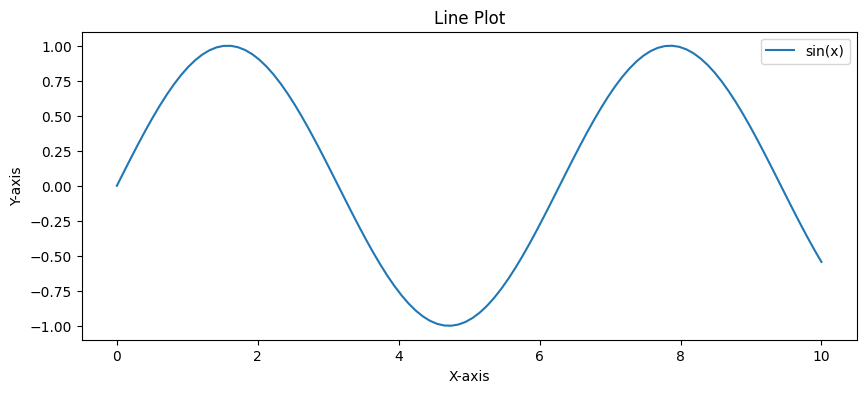

In [4]:
# Line plot
plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values_line, label='sin(x)')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

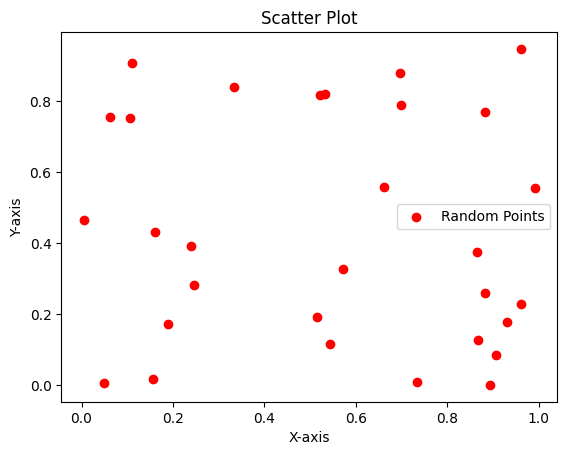

In [15]:
# Scatter plot
plt.scatter(x_values_scatter, y_values_scatter, color='red', marker='o', label='Random Points')
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

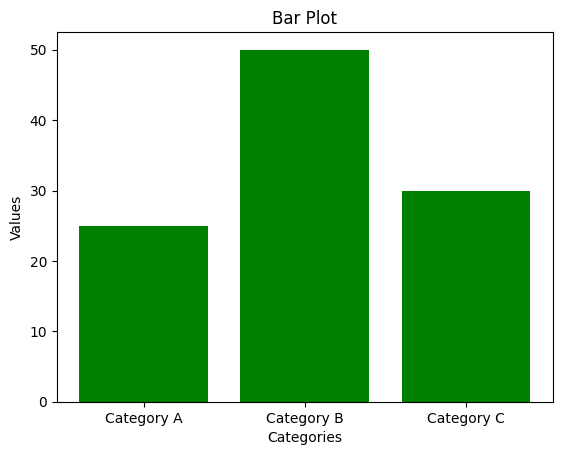

In [16]:
# Bar plot
plt.bar(categories, values_bar, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

### Multiple Plots

Create subplots and configure figures to combine different types of plots. Multiple plots help us present various aspects of the data in a single visualization.

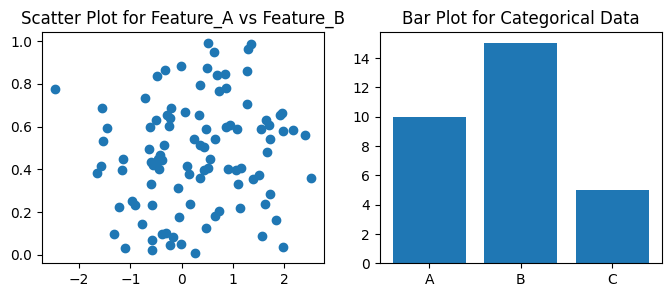

In [17]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Scatter plot
axes[0].scatter(data['Feature_A'], data['Feature_B'])
axes[0].set_title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
axes[1].bar(data_bar['Category'], data_bar['Values'])
axes[1].set_title('Bar Plot for Categorical Data')

plt.show()


#### Alternate Method

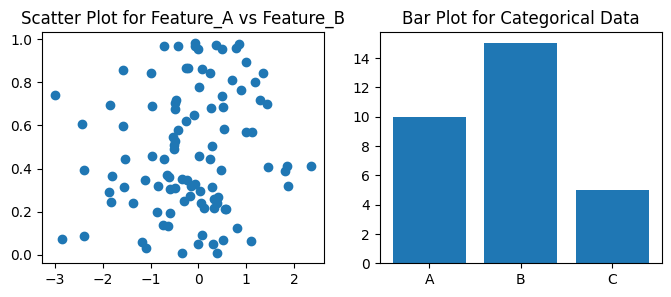

In [145]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
plt.figure(figsize=(8,3))

# Scatter plot
plt.subplot(1,2,1)
plt.scatter(data['Feature_A'], data['Feature_B'])
plt.title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
plt.subplot(1,2,2)
plt.bar(data_bar['Category'], data_bar['Values'])
plt.title('Bar Plot for Categorical Data')

plt.show()

### Advanced Distribution Plot Types

Advanced plot types provide additional insights into the distribution and spread of the data. Explore advanced plot types like histograms, box plots, and violin plots, using matplotlib & seaborn

- Histograms: Good for understanding the overall distribution and frequency of data values.
- Box Plots: Useful for summarizing the central tendency and spread of data, as well as identifying outliers.
- Violin Plots: Provide a combination of box plot and density plot information, offering insights into distribution shape and density.

C:\Users\gb191\AppData\Local\Temp\ipykernel_27636\2073741840.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])


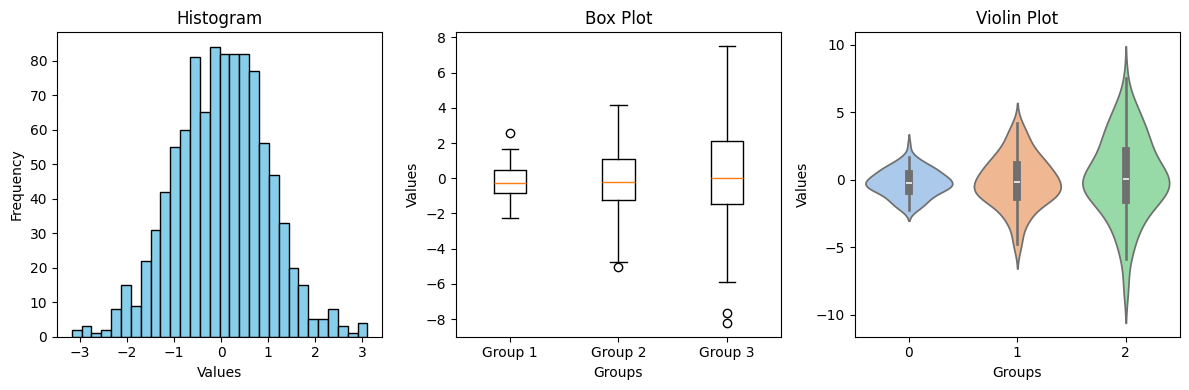

In [146]:
# Sample data
data_histogram = np.random.normal(0, 1, 1000)  # Normally distributed data
data_box_violin = [np.random.normal(0, 1, 100), np.random.normal(0, 2, 100), np.random.normal(0, 3, 100)]

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data_histogram, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=data_box_violin, palette='pastel')
plt.title('Violin Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Three-Dimensional Plots and Colouring
There may be some cases where three-dimensional plots are required. Matplotlib also has the ability to use a colour bar to add greater depth to the plot.

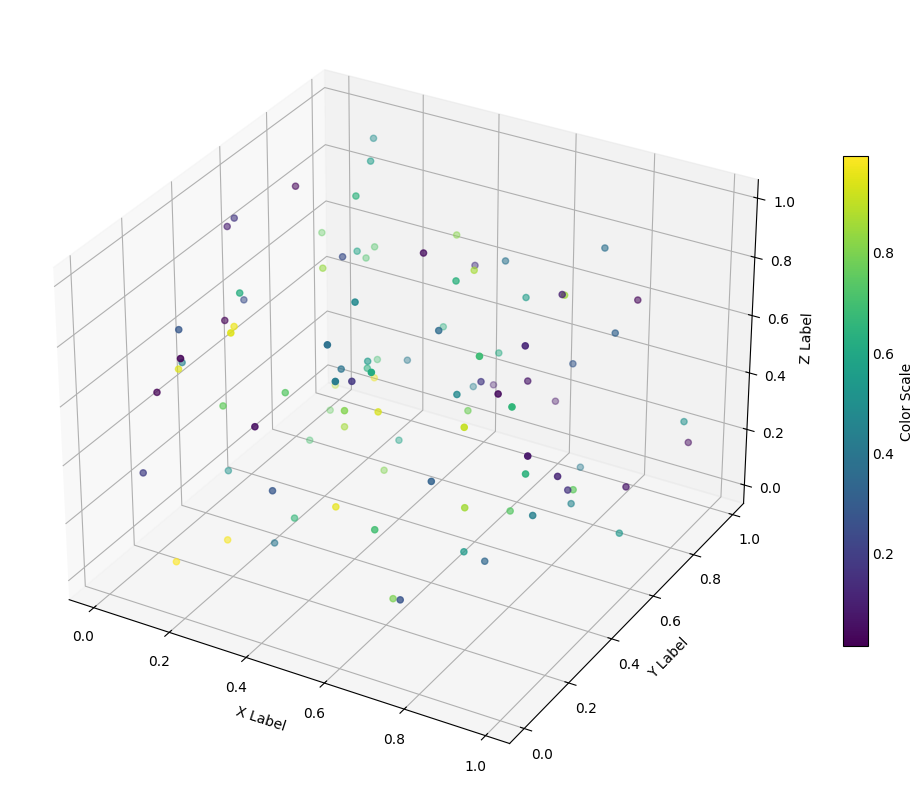

In [154]:
# Generate some example data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
colours = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colours, cmap='viridis')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a color bar
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5)
color_bar.set_label('Color Scale')

# Show the plot
plt.show()

# Statistical Analysis

### Descriptive Statistics

In this section, we'll cover basic descriptive statistics, including mean, median, mode, and measures of dispersion. Descriptive statistics help us summarize and understand the main features of a dataset.

Mean: 4.47
Median: 5.0
Mode: 1
Min: 0
Max: 9


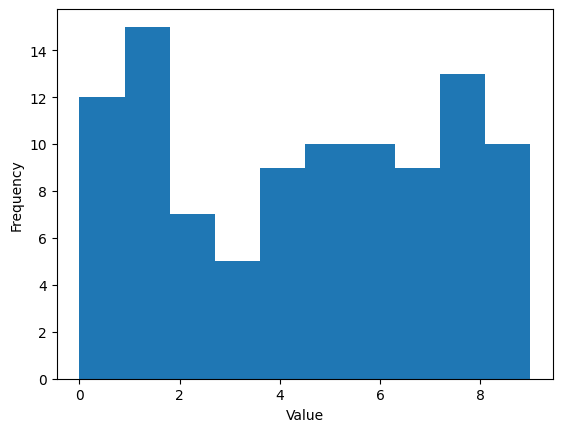

In [18]:
# Create a DataFrame for Step 1 - Descriptive Statistics
rand_vals = np.random.randint(0,10,100)
data_descriptive = pd.DataFrame({'Values': rand_vals})


# Calculating mean, median, mode
mean_value = data_descriptive['Values'].mean()
median_value = data_descriptive['Values'].median()
mode_value = data_descriptive['Values'].mode().iloc[0] 
min_value = data_descriptive["Values"].min()
max_value = data_descriptive["Values"].max()

#Note: if there are multiple values for mode, a dataframe of results would be returned unless .iloc[0] included

print(f"Mean: {mean_value}\nMedian: {median_value}\nMode: {mode_value}\nMin: {min_value}\nMax: {max_value}")

plt.hist(rand_vals)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### **Correlation Tests**

Correlation analysis helps us understand the strength (indicated by the magnitude of the coefficient) as well as the direction (indicated by the sign of the coefficient) of the relationship between two variables. The Pearson Correlation and Spearman Correlation are amongst the most popular methods to calculate correlation. We will explore these two methods using the scipy stats library in Python. There are some key differences between these two methods:

#### Pearson Correlation
Also known as linear correlation, measures the linear relationship between two continuous variables. 
$$
r = \frac{\sum_{}\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}{\sqrt{\sum_{}\left(x_{i} - \bar{x}\right)^{2}\sum_{}\left(y_{i} - \bar{y}\right)^{2}}} \\
\\
Where: \\
x_{i} = x \: samples \\
y_{i} = y \: samples \\
\bar{x} = mean \:  of \: x \\
\bar{y} = mean \: of \: y \\
$$

Before calculating the Pearson's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Variables are quantitative - continuous
3. Data is paired - each x value is associated with a y value
4. Observations are independent
5. Data is normally distributed
6. Minimal outliers in the data

#### Spearman Correlation
Spearman Correlation measures a monotonic relatoinship between two variables based on the rank of the data. A monotonic relationship means the size of one variable increases whilst the other variable also increases, or when the size of one variable increases whilst the other decreases. It is a relationship between two variables such that when there is a change in one variable in a given direction, the other always changes in the same direction (either in the direction of the first variable, or in the opposite direction). 

$$
r_{s} = 1- \frac{6\sum_{}d^{2}}{n\left(n^{2} - 1\right)} \\
\\
Where: \\
n = number \: of \: obervations \\
d = difference \: between \: ranks \\
$$

The rank is simply the position of the data point in descending order. E.g. for the data points [10, 5, 21, 3] the rank is [2, 3, 1, 4]

Before calculating the Spearman's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Data is paired - each x value is associated with a y value
3. Observations are independent
5. Variables are ordinal or continuous
6. The data does not need to be normally distributed



Both coefficients range from -1 to 1, indicating the strength and direction of the relationship.

Understanding these correlation coefficients is essential for choosing the appropriate method based on the nature of your data and the relationship you are investigating.

In [19]:
# Sample data
data_corr_x = pd.Series([1, 2, 3, 4, 5])
data_corr_y = pd.Series([2, 3, 4, 5, 6])

# Pearson correlation
pearson_corr, _ = stats.pearsonr(data_corr_x, data_corr_y)

# Spearman rank correlation
spearman_corr, _ = stats.spearmanr(data_corr_x, data_corr_y)

print(f"Pearson Correlation: {pearson_corr}, Spearman Correlation: {spearman_corr}")


Pearson Correlation: 1.0, Spearman Correlation: 0.9999999999999999


In [20]:
def subplot_corr(x: np.ndarray, y: np.ndarray, data_shape: str, subplot_rows: int, subplot_cols: int, subplot_pos: int):
    """
    Create a subplot with a scatterplot of two arrays against each other. 
    Also calculates the pearson and spearman coefficients and displays them on the plot
    
    Params:
    x: first array
    y: second array
    data_shape: string used in title to explain what shape y follows
    subplot_rows: number of rows in subplot
    subplot_cols: number of columns in subplot
    subplot_pos: position of current plot
    """
    pearson_corr, _ = stats.pearsonr(x, y)
    pearson_corr = np.round(pearson_corr,2)
    spearman_corr, _ = stats.spearmanr(x, y)
    spearman_corr = np.round(spearman_corr,2)

    plt.subplot(subplot_rows, subplot_cols, subplot_pos)
    plt.scatter(x,y)
    plt.title(f"For {data_shape} Data\nPearson Correlation: {pearson_corr}\nSpearman Correlation: {spearman_corr}")

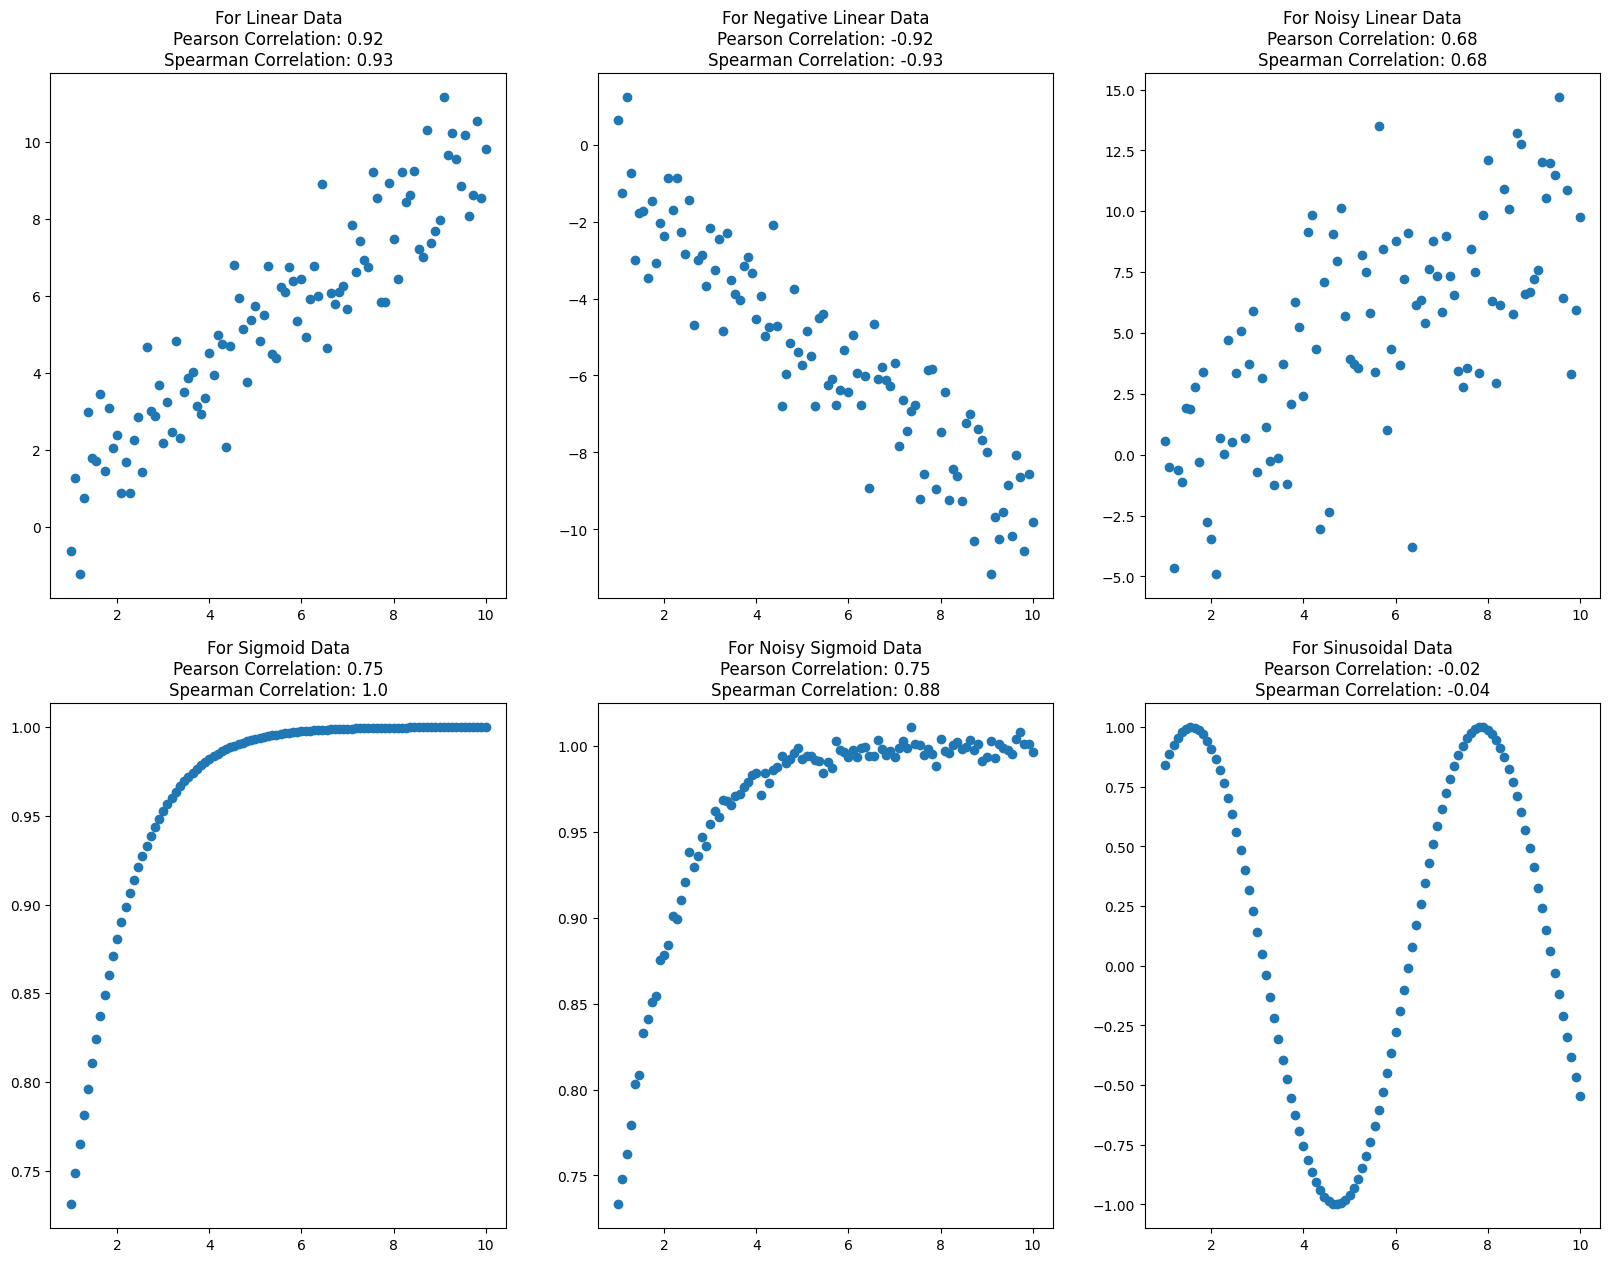

In [21]:
linear_x = np.linspace(1,10,100)

linear_y = linear_x + np.random.normal(0,1,100)
linear_y_negative = -linear_y
linear_y_noisy = linear_x + np.random.normal(0,3,100)
sigmoid_y = 1/ (1+np.exp(-linear_x))
sigmoid_y_noisy = 1/ (1+np.exp(-linear_x)) + + np.random.normal(0,0.005,100)
parabolic_y = np.sin(linear_x)

y_dict = {"Linear"        : linear_y, 
        "Negative Linear" : linear_y_negative, 
        "Noisy Linear"    : linear_y_noisy, 
        "Sigmoid"         : sigmoid_y, 
        "Noisy Sigmoid"   : sigmoid_y_noisy, 
        "Sinusoidal"      : parabolic_y
}

y_df = pd.DataFrame(y_dict)

plt.figure(figsize=(20,15))

i = 1
for col in y_df:
    subplot_corr(linear_x, y_df[col], col, 2, 3 ,i)
    i+=1
plt.show()
    

## Exploratory Data Analysis (EDA)

### Understanding Data Distributions

Understanding data distributions is crucial for gaining insights into the central tendencies and shapes of datasets. Let's explore descriptive statistics like mean, median, skewness, and kurtosis. 

Two key statistical techniques used to determine the shape of a frequency distribution are Sknewness and Kurtosis. A frequency distribution represents the number of occurrences of each value within a dataset. 
- Skewness measures the asymmetry of a distribution. It indicates whether the data is skewed to the left (negatively skewed) or to the right (positively skewed).
  - Symmetric (Skew ~= 0): The distribution looks the same to the left and right of the center point. In this case, the mean, median, and mode are equal, and there is no skewness.
  - Positive Skewness (Skew > 0): The right tail is longer than the left tail, indicating that the concentration of frequencies is more towards higher values. Here, the mean is greater than the median. 
  - Negative Skewness (Skew < 0): The left tail is longer than the right tail, indicating that the concentration of frequencies is more towards lower values. Here, the mean is less than the median. <br><br>
- Kurtosis measures the tailedness or sharpness of a distribution. It indicates whether the data has heavy or light tails compared to a normal distribution.
  - Leptokurtic (Kurtosis > 3): Has a higher peak than the normal distribution, indicating a high concentration of data points near the mean and heavier tails.
  - Mesokurtic (Kurtosis = 3): Has a peak similar to the normal distribution, indicating a moderate concentration of data points around the mean.
  - Platykurtic (Kurtosis < 3): Has a lower peak than the normal distribution, indicating a lower concentration of data points around the mean and lighter tails.

[Difference Between Sknewness and Kurtosis](https://www.geeksforgeeks.org/difference-between-skewness-and-kurtosis/)

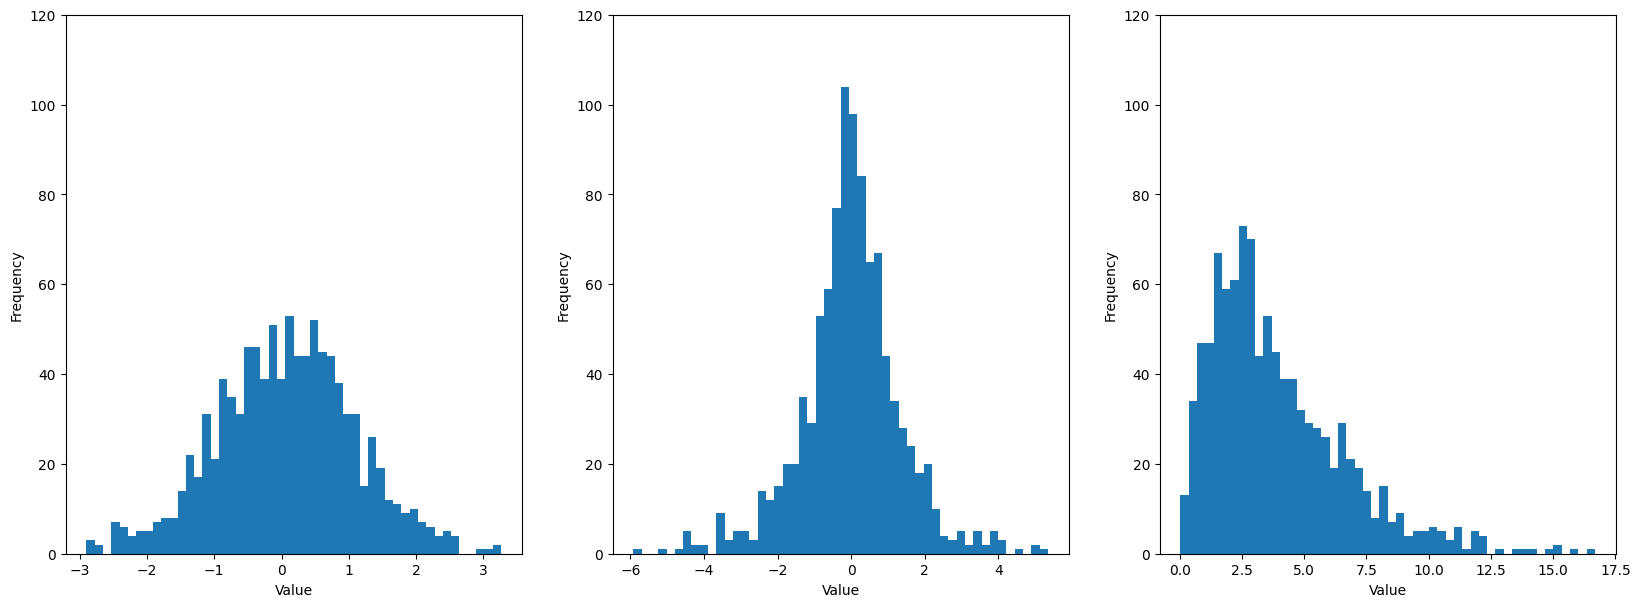

In [22]:
# Sample data for EDA
data_eda = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 1000),
    'Feature_B': np.random.laplace(0, 1, 1000),
    'Feature_C': np.random.gamma(2 ,2, 1000)
})


plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])


plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.show()

We can set density = True for our histogram plot. This means we are computing the probability of a specific value being part of that bin. It is also important when you are comparing different distribution plots that you consider the scale of the y-axis. It is also really important to ensure you use the same number of bins for each distribution, because this greatly changes how the plots look.

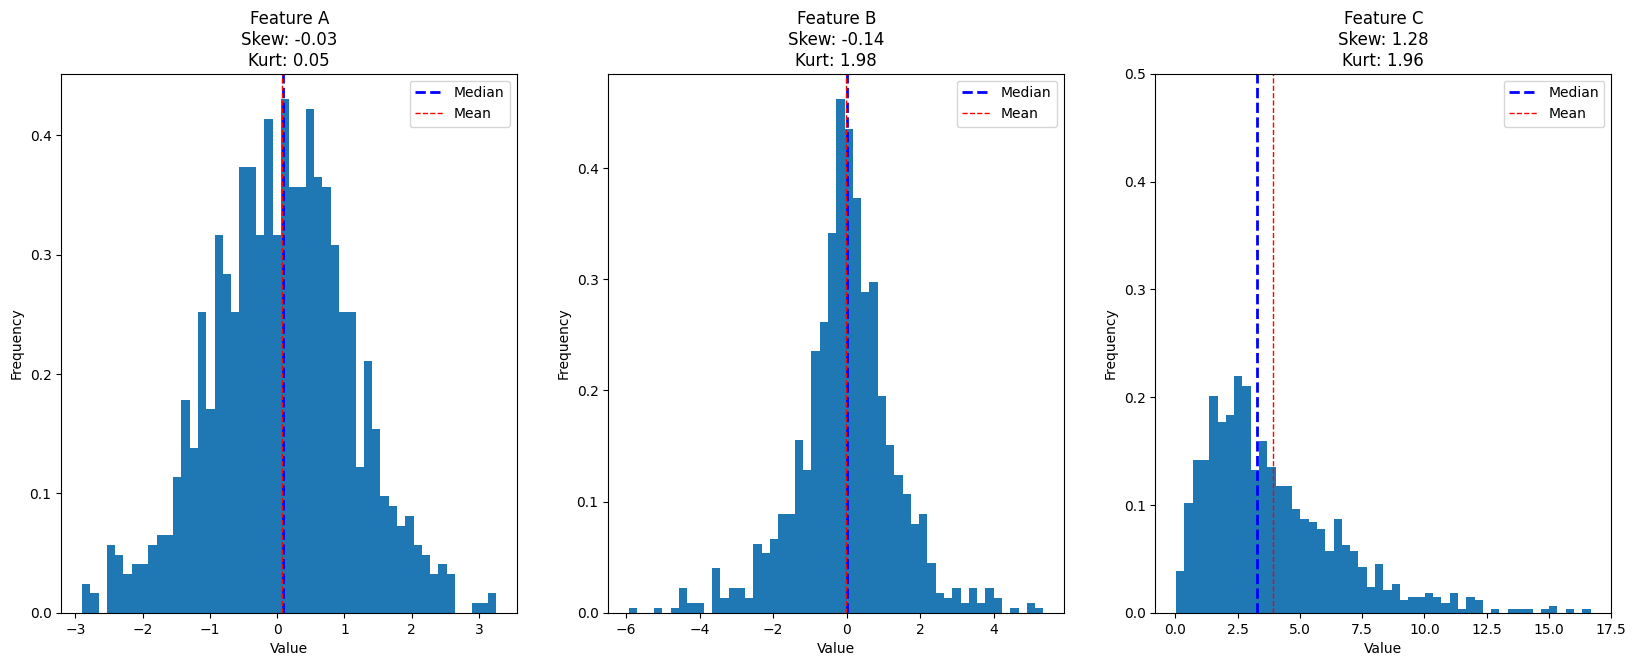

In [23]:
# Descriptive statistics for each feature column
mean_A   = data_eda["Feature_A"].mean()
median_A = data_eda["Feature_A"].median()
skew_A   = data_eda["Feature_A"].skew()
kurt_A   = data_eda["Feature_A"].kurt()

mean_B   = data_eda["Feature_B"].mean()
median_B = data_eda["Feature_B"].median()
skew_B   = data_eda["Feature_B"].skew()
kurt_B   = data_eda["Feature_B"].kurt()

mean_C   = data_eda["Feature_C"].mean()
median_C = data_eda["Feature_C"].median()
skew_C   = data_eda["Feature_C"].skew()
kurt_C   = data_eda["Feature_C"].kurt()

#Round for plotting
skew_A = np.round(skew_A,2)
kurt_A = np.round(kurt_A,2)
skew_B = np.round(skew_B,2)
kurt_B = np.round(kurt_B,2)
skew_C = np.round(skew_C,2)
kurt_C = np.round(kurt_C,2)

# Descriptive statistics for feature C column
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50, density=True)
plt.axvline(median_A, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_A, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature A\nSkew: {skew_A}\nKurt: {kurt_A}")
plt.legend()

plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50, density=True)
plt.axvline(median_B, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_B, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature B\nSkew: {skew_B}\nKurt: {kurt_B}")
plt.legend()

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50, density=True)
plt.axvline(median_C, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_C, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature C\nSkew: {skew_C}\nKurt: {kurt_C}")
plt.ylim([0,0.5])
plt.legend()

plt.show()


## Correlation Analysis
Explore Pearson correlation and visualize correlations using seaborn heatmaps. We will explore correlation and heatmaps in more detail during later weeks.

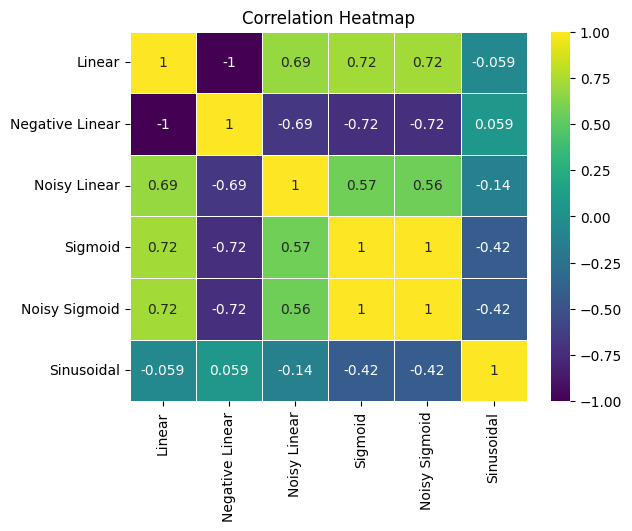

In [24]:
# Correlation matrix
corr_matrix = y_df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap="viridis")
plt.title('Correlation Heatmap')
plt.show()


## Outlier Detection

Outlier detection is essential for understanding anomalies that may impact statistical analyses. Identify and handle outliers using visualization techniques. 

In [25]:
# Create a dataset with outliers

# Set a random seed for reproducibility
np.random.seed(42)
# Generate a dataset with a normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=100)
# Add outliers
outliers = np.array([20, 80, 90, 110])
# Combine the normal data with outliers
data_with_outliers = np.concatenate([normal_data, outliers])

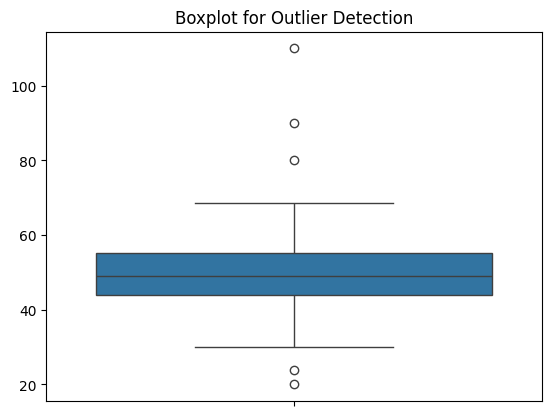

In [26]:
# Box plot for outlier detection
sns.boxplot(data=data_with_outliers)
plt.title('Boxplot for Outlier Detection')
plt.show()


### Data Distribution Exploration

Exploring data distributions helps us understand the shape and patterns within the data. Perform univariate and bivariate analysis using histograms, kernel density plots, scatter plots, and pair plots. 

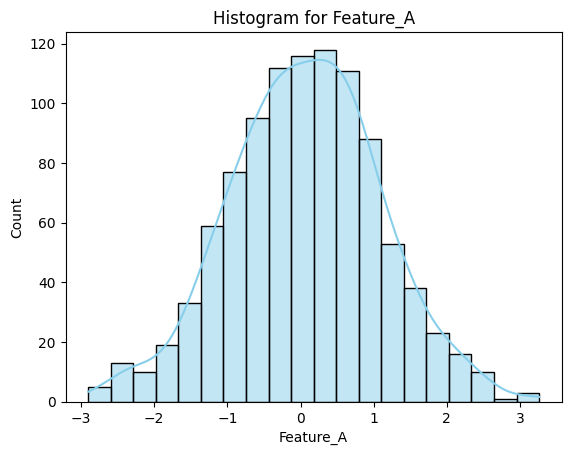

In [27]:
# Univariate analysis: Histogram
sns.histplot(data_eda['Feature_A'], kde=True, color='skyblue', bins=20)
plt.title('Histogram for Feature_A')
plt.show()


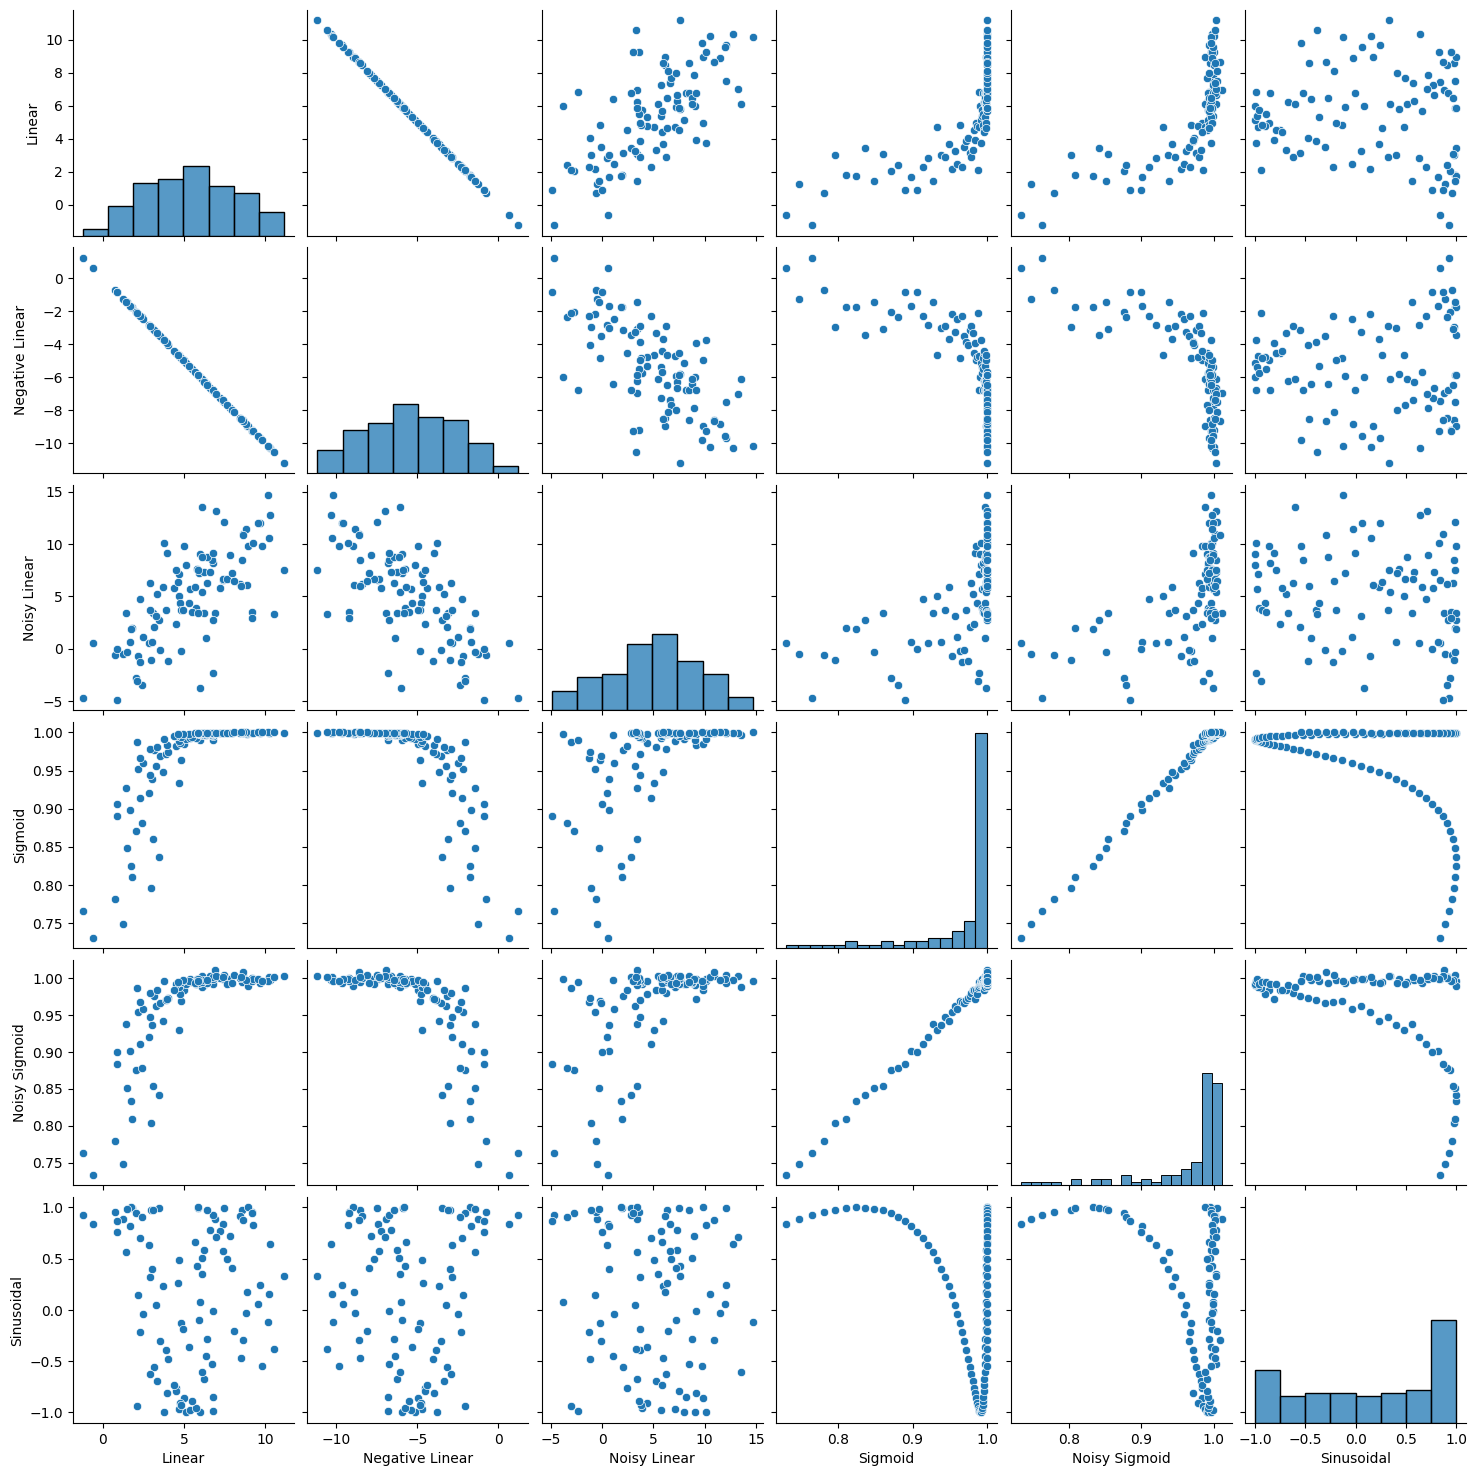

In [28]:
# Bivariate analysis: Pair plot
sns.pairplot(y_df)
plt.show()

### Pandas Profiling

pandas-profiling is a powerful library for generating profile reports from a Pandas DataFrame. It provides an overview of the dataset, including descriptive statistics, correlations, missing values, and more. It has recently had a change of library name to **ydata_profiling**

In [29]:
# Create a 100 row dataset made up of 4 numerical columns & 2 string columns

# Set a random seed for reproducibility
np.random.seed(42)
# Generate numerical columns
num_columns = {
    'Numeric1': np.random.randint(1, 100, size=100),
    'Numeric2': np.random.uniform(0, 1, size=100),
    'Numeric3': np.random.normal(50, 10, size=100),
    'Numeric4': np.random.choice([0, 1], size=100),
}
# Generate string columns
str_columns = {
    'String1': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'String2': np.random.choice(['X', 'Y', 'Z'], size=100),
}
# Create a DataFrame
df = pd.DataFrame({**num_columns, **str_columns})

# Display the first few rows of the dataset
df.head()

Numeric1  Numeric2   Numeric3  Numeric4 String1 String2
0        52  0.280935  40.094637         1       C       Z
1        93  0.542696  44.337023         0       B       Y
2        15  0.140924  50.996514         0       B       X
3        72  0.802197  44.965243         1       B       X
4        61  0.074551  34.493366         0       A       Z

In [30]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


### Spatial plotting

In [31]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
Note: you may need to restart the kernel to use updated packages.


    click (>=7.*)
           ~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import geopandas as gpd

In [33]:
pwd

'c:\\LocalData\\gb191\\intro-to-python\\week4'

In [141]:
# Create a geodataframe from a local geodatabase 
gdf = gpd.read_file("/workspaces/intro-to-python/week4/data.gdb")
gdf

DataSourceError: '/workspaces/intro-to-python/week4/data.gdb' does not exist in the file system, and is not recognized as a supported dataset name.

In [34]:
# List all the methods of the geometry object in geopandas
dir(gdf.geometry[0])

NameError: name 'gdf' is not defined

In [27]:
# Inspect brisbane subset
brisbane_PDAs = (gdf[gdf["LGA_NAME"] == "Brisbane"])[['LGA_NAME','PDA_NAME', 'PDA_STATUS', 'REGULATION_CODE', 'geometry']]
brisbane_PDAs

LGA_NAME                        PDA_NAME PDA_STATUS  REGULATION_CODE  \
2   Brisbane    Roma Street Cross River Rail   Declared               16   
3   Brisbane     Boggo Road Cross River Rail   Declared               18   
7   Brisbane                   Woolloongabba   Declared               21   
9   Brisbane                     Bowen Hills   Declared                2   
12  Brisbane                           Oxley   Declared               13   
14  Brisbane                 Herston Quarter   Declared               11   
18  Brisbane                         Yeronga   Declared               14   
22  Brisbane             Northshore Hamilton   Declared                1   
23  Brisbane  Albert Street Cross River Rail   Declared               15   
26  Brisbane          Queen's Wharf Brisbane   Declared                8   
28  Brisbane                      Fitzgibbon   Declared                3   

                                             geometry  
2   MULTIPOLYGON (((153.01846 -27.46455, 153.01848...  
3   MULTIPOLYGON (((153.02958 -27.49299, 153.02995...  
7   MULTIPOLYGON (((153.02279 -27.48250, 153.02280...  
9   MULTIPOLYGON (((153.04039 -27.43376, 153.04051...  
12  MULTIPOLYGON (((152.96685 -27.55047, 152.96690...  
14  MULTIPOLYGON (((153.02508 -27.44697, 153.02490...  
18  MULTIPOLYGON (((153.02009 -27.51558, 153.02032...  
22  MULTIPOLYGON (((153.08386 -27.43445, 153.08451...  
23  MULTIPOLYGON (((153.02764 -27.47168, 153.02749...  
26  MULTIPOLYGON (((153.02371 -27.47098, 153.02401...  
28  MULTIPOLYGON (((153.04973 -27.33000, 153.05019...

In [28]:
centroids_x = []
centroids_y = []
for _, row in brisbane_PDAs.iterrows():
    centroids_x.append(row.geometry.centroid.x)
    centroids_y.append(row.geometry.centroid.y)

global_centroid_x = sum(centroids_x)/len(centroids_x)
global_centroid_y = sum(centroids_y)/len(centroids_y)


In [29]:
global_centroid_x, global_centroid_y # y is latitude and x is longitude

(153.0274899842586, -27.466948148389495)

In [30]:
pip install folium


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import folium

# Initialise folium map object
brisbane_pda_map = folium.Map(location=[global_centroid_y, global_centroid_x], zoom_start=12)  # Set the initial map location and zoom
brisbane_pda_map

In [33]:
folium.GeoJson(brisbane_PDAs).add_to(brisbane_pda_map)
brisbane_pda_map

### Examples of other visualisations
In this section, we will share some other visulisation techniques, which have been used in EQL projects. This is just to give you an idea of how data can be used/visualised, so the code won't be shared

The below visualisation shows an "accuracy metric" for each NMI in EQX region:

<img src="img/study group viz 1.png" alt="Map Visualisation" />

The below visualisation shows a layered heatmap. The back layer is a heatmap of a customers load/usage every 5 minutes in a given week. The front layer (the greyed out section), shows the responsiveness of the customer's controlled load devices

<img src="img/viz 2.png" alt="Layered Heatmap Visualisation" />

The below visualisation is a hexbin plot (hexagonal binning). Hexbin plots take in X and Y values and returns what looks somewhat similar to a scatter plot, but where the entire graphing space has been divided into hexagons and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density of each hexagonal area. An alternative way to think about these plots is that hexbins is a 2D histogram plot, in which the bins are hexagons and the color represents the number of data points within each bin.

<img src="img/viz 3.PNG" alt="hexbin Visualisation" />

Below are visualisations of GHI, DNI and DHI throughout the year in SE Queensland. GHI, DNI and DHI are three different measurements to capture the solar irradiance seen on the surface of the earth.

<img src='img/GHI_year_plot.png' alt = "GHI of Year">
<img src='img/DNI_year_plot.png' alt = "DNI of Year">
<img src='img/DHI_year_plot.png' alt = "DHI of Year">


## Challenge Task

Now it's time to see how much you have learnt from this week and last week, across all the topics: data cleaning, manipulation, analysing & visualising. Below is a synthetic dataset about the electricity consumption of 200 households in the US. Using this dataset, please complete the following:
- An EDA to see what state the data is currently in. Use whatever method you would like, but briefly describe (in a markdown cell) everything you have learnt about the dataset, prior to applying any cleaning methods.
- Apply data cleaning & manipulation techniques where required
- Apply your data analytics skills to find out useful information about the cleaned dataset, as well as any relationships between the attributes. Describe your findings in a markdown cell.
- Create at least 2 visualisations using the dataset

In [20]:
# Below is the first 5 rows of the dataset you will use for the Challenge Task. Make sure you have run the first command of this notebook for this to work
challenge_df.head()


Household_ID  Electricity_Consumption_kWh Region  Appliance_Count  \
0             1                   224.835708  South                5   
1             2                   193.086785  South                3   
2             3                   232.384427  North                1   
3             4                   276.151493   West                1   
4             5                   188.292331  North                8   

   Monthly_Bill_USD  Household_Members Has_Solar_Panels  
0        107.160701                  1              yes  
1        217.925171                  1               no  
2        204.532060                  1              yes  
3        139.540680                  1              yes  
4         78.389398                  2              yes

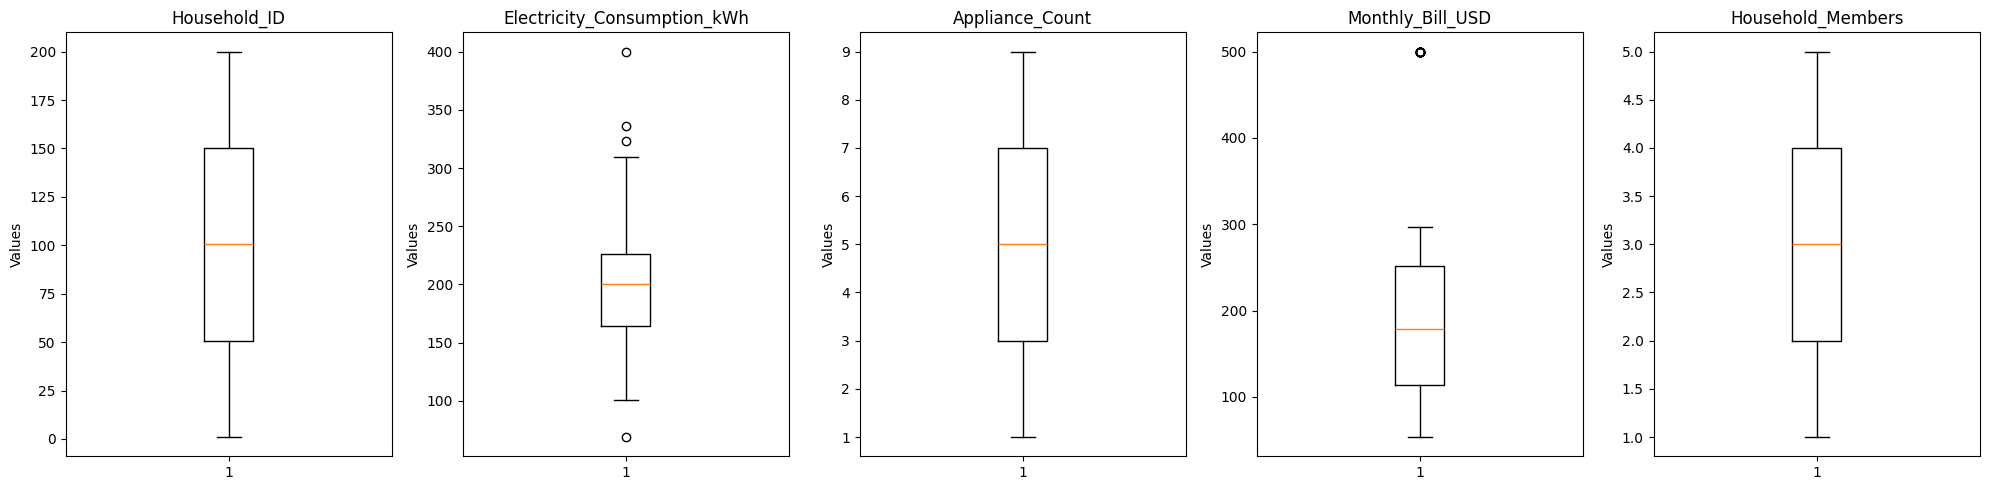

In [21]:
# Only plotting numeric columns
numeric_cols = ['Household_ID', 'Electricity_Consumption_kWh','Appliance_Count', 'Monthly_Bill_USD', 'Household_Members']


plt.figure(figsize=(20,5))

for i, numeric_col in enumerate(numeric_cols):

    # Boxplots require datasets without nulls. We don't want to remove these rows from the dataframe yet, but we do want to see the full boxplot for each column
    if challenge_df[numeric_col].isnull().any():
        numeric_data = challenge_df[numeric_col].dropna()
    else:
        numeric_data = challenge_df[numeric_col]

    plt.subplot(1,5,i+1)
    plt.boxplot(numeric_data)
    plt.ylabel("Values")
    plt.title(numeric_col)

plt.tight_layout()
plt.show()


In [22]:
# Complete first EDA here

profile = ProfileReport(challenge_df, title="Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


In [7]:
challenge_df.dtypes

Household_ID                     int64
Electricity_Consumption_kWh    float64
Region                          object
Appliance_Count                  int32
Monthly_Bill_USD               float64
Household_Members                int32
Has_Solar_Panels                object
dtype: object

In [8]:
challenge_df.isnull().sum()

Household_ID                    0
Electricity_Consumption_kWh     1
Region                          0
Appliance_Count                 0
Monthly_Bill_USD               30
Household_Members               0
Has_Solar_Panels                0
dtype: int64

There seems to be no relationship between any of the columns

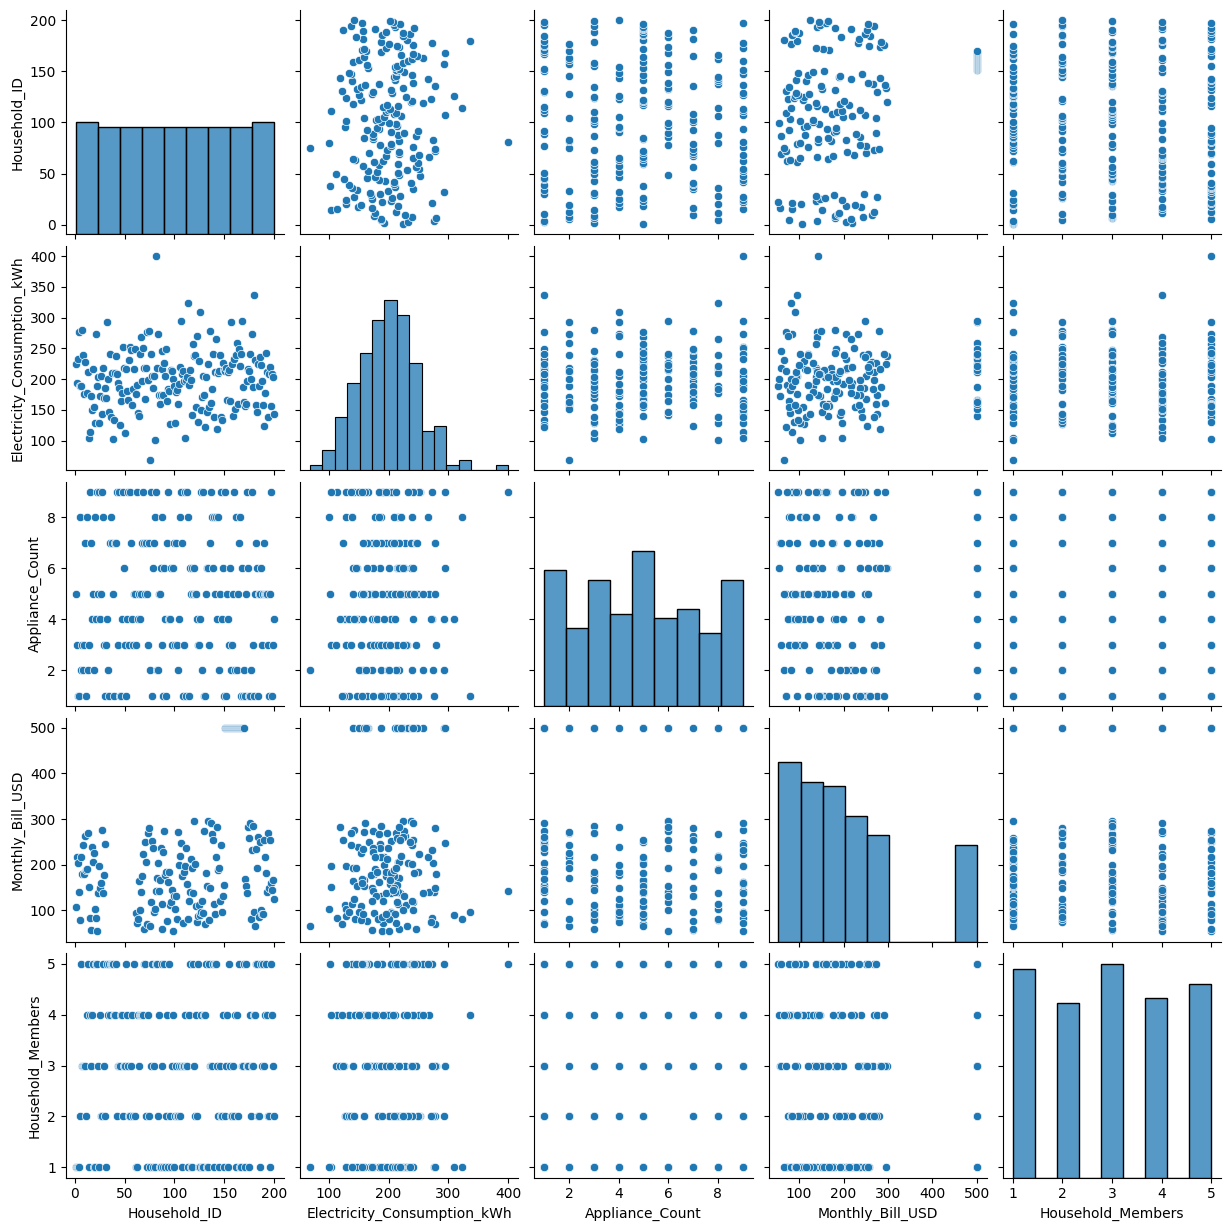

In [9]:
sns.pairplot(challenge_df)
plt.show()


FINDINGS FROM FIRST EDA:

- Whole DF --> 200 rows x 7 columns, no duplicates
- Household ID --> no missing values, all unique
- Electricity_Consumption_kWh --> 1 missing value, all unique, possible outlier = 400, mostly normally distributed
- Region --> 4 areas, N E S W, no missing, mostly even split except for lower frequency in East region
- Appliace_count --> values 1 to 9, no missing with a lot of houses with 1, 5 and 9 appliances
- Monthly_Bill_USD --> 30 missing values, outlier = 500 (frequency = 20 times), close to even distribution
- Household_Members --> 1 to 5, no missing values, close to even distribution
- Has_Solar_Panels --> Boolean = True or False, no missing values, close to even split

DATA CLEANING REQUIRED:

- Address missing values
- Investigate & address outliers in Electricity_Consumption_kWh & Monthly_Bill_USD columns


In [12]:
# Check which rows have null values

challenge_df[challenge_df.isnull().any(axis=1)]

Household_ID  Electricity_Consumption_kWh Region  Appliance_Count  \
10            11                          NaN  North                1   
30            31                   169.914669   West                3   
31            32                   292.613909  South                4   
32            33                   199.325139   West                2   
33            34                   147.114454   East                1   
34            35                   241.127246   East                7   
35            36                   138.957818   East                8   
36            37                   210.443180   West                7   
37            38                   102.016494  South                5   
38            39                   133.590698  South                1   
39            40                   209.843062   West                7   
40            41                   236.923329   East                7   
41            42                   208.568414   East                9   
42            43                   194.217586  South                3   
43            44                   184.944815   East                9   
44            45                   126.073900  North                1   
45            46                   164.007790  South                1   
46            47                   176.968061   East                4   
47            48                   252.856111  South                9   
48            49                   217.180914  North                6   
49            50                   111.847992  South                3   
50            51                   216.204198  South                1   
51            52                   180.745886  South                4   
52            53                   166.153900  South                9   
53            54                   230.583814  North                3   
54            55                   251.549976   West                9   
55            56                   246.564006  South                7   
56            57                   158.039124  South                4   
57            58                   184.539381   East                3   
58            59                   216.563172  South                5   
59            60                   248.777256   East                5   

    Monthly_Bill_USD  Household_Members Has_Solar_Panels  
10         187.97671                  2               no  
30               NaN                  1               no  
31               NaN                  5              yes  
32               NaN                  4               no  
33               NaN                  5              yes  
34               NaN                  4              yes  
35               NaN                  5               no  
36               NaN                  5              yes  
37               NaN                  5               no  
38               NaN                  4               no  
39               NaN                  4              yes  
40               NaN                  5              yes  
41               NaN                  2              yes  
42               NaN                  3              yes  
43               NaN                  3               no  
44               NaN                  3               no  
45               NaN                  4              yes  
46               NaN                  4               no  
47               NaN                  2               no  
48               NaN                  3               no  
49               NaN                  3               no  
50               NaN                  5              yes  
51               NaN                  4              yes  
52               NaN                  3               no  
53               NaN                  2              yes  
54               NaN                  2              yes  
55               NaN                  3              yes  
56             

There does not seem to be any relationship between Monthly_Bill_USD and other values. Therefore we have no way of being able to extrapolate what the missing values could be. Also because there are so many missing values, filling them with the mean or zero can greatly skew our dataset. Therefore the most suitable solution is to simply remove rows with missing values

In [13]:
challenge_df_cleaned = challenge_df.dropna()
challenge_df_cleaned

Household_ID  Electricity_Consumption_kWh Region  Appliance_Count  \
0               1                   224.835708  South                5   
1               2                   193.086785  South                3   
2               3                   232.384427  North                1   
3               4                   276.151493   West                1   
4               5                   188.292331  North                8   
..            ...                          ...    ...              ...   
195           196                   219.265869  North                5   
196           197                   155.807128  North                9   
197           198                   207.686255  North                1   
198           199                   202.910436   East                3   
199           200                   142.851485   East                4   

     Monthly_Bill_USD  Household_Members Has_Solar_Panels  
0          107.160701                  1              yes  
1          217.925171                  1               no  
2          204.532060                  1              yes  
3          139.540680                  1              yes  
4           78.389398                  2              yes  
..                ...                ...              ...  
195        254.149860                  1               no  
196        159.783727                  5               no  
197        144.236107                  4               no  
198        165.669946                  3               no  
199        125.344469                  2              yes  

[169 rows x 7 columns]

We have a few outlier values in the Electricity_Consumption_kWh column. So the easiest way to handle multiple values is to find the upper and lower quantiles, then filter the dataset on them. You can also manually determine what values are outliers, but this method is relatively quick to implement. Just make sure to justify why you are using the specic quantile.

In [14]:
lower_quantile = challenge_df_cleaned['Electricity_Consumption_kWh'].quantile(0.02)
upper_quantile = challenge_df_cleaned['Electricity_Consumption_kWh'].quantile(0.98)

print(f"Lower 2% Quantile: {lower_quantile}")
print(f"Upper 98% Quantile: {upper_quantile}")

challenge_df_cleaned = challenge_df_cleaned[challenge_df_cleaned['Electricity_Consumption_kWh']>=lower_quantile]
challenge_df_cleaned = challenge_df_cleaned[challenge_df_cleaned['Electricity_Consumption_kWh']<=upper_quantile]

Lower 2% Quantile: 107.72651118571588
Upper 98% Quantile: 304.23685371369015


In [15]:
challenge_df_cleaned[challenge_df_cleaned['Monthly_Bill_USD'] > 499]

Household_ID  Electricity_Consumption_kWh Region  Appliance_Count  \
150           151                   212.524643  South                9   
151           152                   217.322410  South                1   
152           153                   165.998764   West                5   
153           154                   211.612685  North                4   
154           155                   214.653624   East                3   
155           156                   164.282429   West                6   
156           157                   293.288726  North                2   
157           158                   223.691646  South                3   
158           159                   140.434825  South                5   
159           160                   232.827680  North                9   
160           161                   151.265916   East                2   
161           162                   239.354230  South                8   
162           163                   257.929779  South                2   
163           164                   158.965884  South                5   
164           165                   248.168806  North                7   
165           166                   220.639046   West                8   
166           167                   241.103008  South                1   
167           168                   294.839649   West                6   
168           169                   187.730594   East                1   
169           170                   162.313192  South                2   

     Monthly_Bill_USD  Household_Members Has_Solar_Panels  
150             500.0                  2               no  
151             500.0                  3              yes  
152             500.0                  4              yes  
153             500.0                  1              yes  
154             500.0                  5              yes  
155             500.0                  3              yes  
156             500.0                  2               no  
157             500.0                  2               no  
158             500.0                  3              yes  
159             500.0                  2              yes  
160             500.0                  4              yes  
161             500.0                  1              yes  
162             500.0                  4               no  
163             500.0                  2              yes  
164             500.0                  5               no  
165             500.0                  1               no  
166             500.0                  1              yes  
167             500.0                  3               no  
168             500.0                  3               no  
169             500.0                  5               no

There were 20 customers (Household_ID 151 through to 170) who had an outlier Monthly_Bill_USD of 500, which is over $200 more than the customer with the next highest bill. As this is an anomoly, these rows will be dropped from the dataset, for the purpose of analysis/visualisation

In [16]:
challenge_df_cleaned = challenge_df_cleaned[challenge_df_cleaned['Monthly_Bill_USD'] < 499]
challenge_df_cleaned

Household_ID  Electricity_Consumption_kWh Region  Appliance_Count  \
0               1                   224.835708  South                5   
1               2                   193.086785  South                3   
2               3                   232.384427  North                1   
3               4                   276.151493   West                1   
4               5                   188.292331  North                8   
..            ...                          ...    ...              ...   
195           196                   219.265869  North                5   
196           197                   155.807128  North                9   
197           198                   207.686255  North                1   
198           199                   202.910436   East                3   
199           200                   142.851485   East                4   

     Monthly_Bill_USD  Household_Members Has_Solar_Panels  
0          107.160701                  1              yes  
1          217.925171                  1               no  
2          204.532060                  1              yes  
3          139.540680                  1              yes  
4           78.389398                  2              yes  
..                ...                ...              ...  
195        254.149860                  1               no  
196        159.783727                  5               no  
197        144.236107                  4               no  
198        165.669946                  3               no  
199        125.344469                  2              yes  

[141 rows x 7 columns]

In [17]:

profile = ProfileReport(challenge_df_cleaned, title="Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


Findings of second EDA: Dataset cleaned & ready for visualisations. NOTE: You may have taken a different approach to data cleaning, manipulation, analysis & visualisation. This is just one way you could approach the task

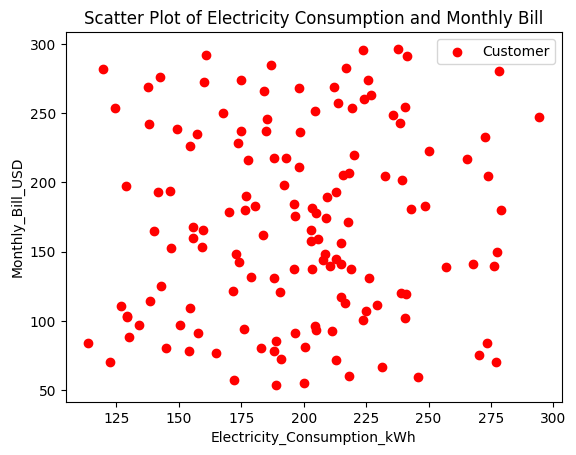

In [18]:
# Scatter plot
plt.scatter(challenge_df_cleaned['Electricity_Consumption_kWh'], challenge_df_cleaned['Monthly_Bill_USD'], color='red', marker='o', label = 'Customer')
plt.title('Scatter Plot of Electricity Consumption and Monthly Bill')
plt.xlabel('Electricity_Consumption_kWh')
plt.ylabel('Monthly_Bill_USD')
plt.legend()
plt.show()

From visualisation 1, it appears that there isn't really a correlation between electricity consumption & monthly bill (for this synthetic dataset). Lets investigate other correlations (or possibly, lack of correlations), using a correlation matrix below for only the numerical attributes (colums)

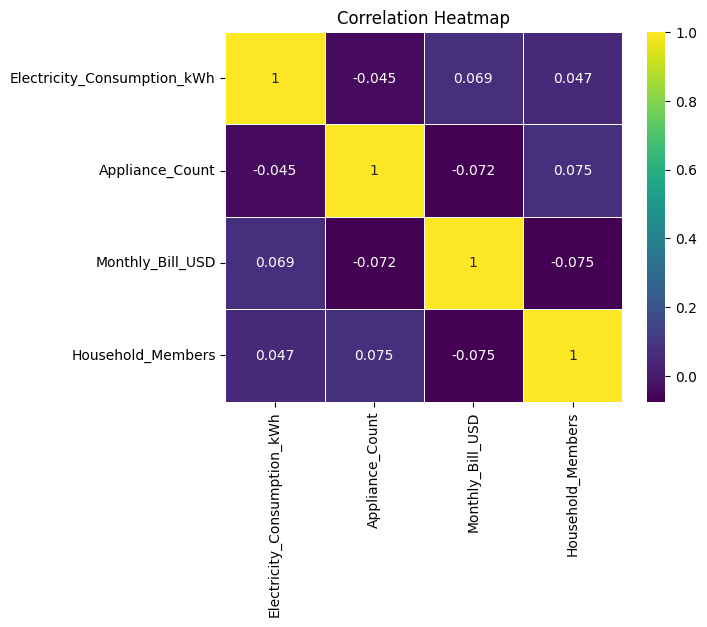

In [19]:
# Correlation matrix
corr_matrix = challenge_df_cleaned[['Electricity_Consumption_kWh', 'Appliance_Count', 'Monthly_Bill_USD', 'Household_Members']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()